In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df=pd.read_csv('D:/Pima-Indians-Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Label                       False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Label                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Analysis

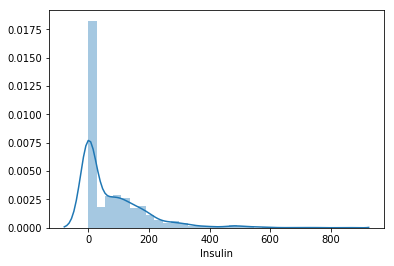

In [8]:
sns.distplot(df['Insulin'])
plt.show()

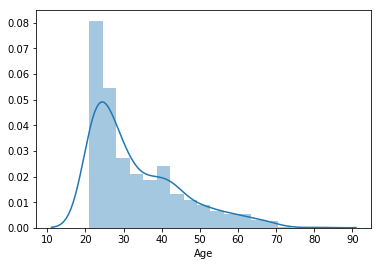

In [9]:
sns.distplot(df['Age'])
plt.show()

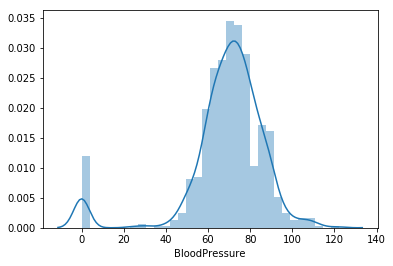

In [10]:
sns.distplot(df['BloodPressure'])
plt.show()

# Bivariate Analysis

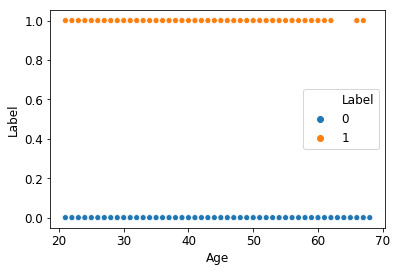

In [49]:
sns.scatterplot(x='Age', y='Label', hue='Label', data=df)

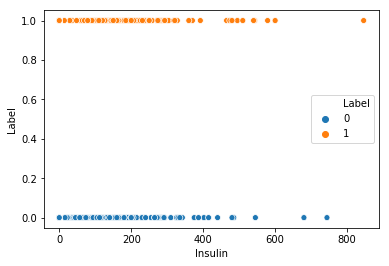

In [12]:
sns.scatterplot(x='Insulin', y='Label', hue='Label', data=df)

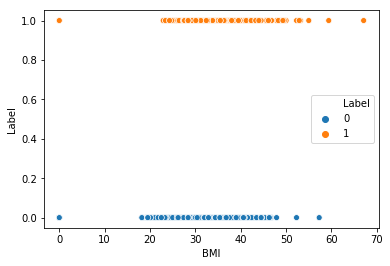

In [13]:
sns.scatterplot(x='BMI', y='Label', hue='Label', data=df)

In [14]:
#SkinThikness associated with Label
df.groupby(['SkinThickness']).agg({'Label': 'sum'}).sort_values(by= 'Label', ascending = False).head()

,Label
SkinThickness,
0,88
32,14
33,9
30,9
39,8


In [15]:
#BloodPressure associated with Label
df.groupby(['BloodPressure']).agg({'Label': 'sum'}).sort_values(by= 'Label', ascending = False).head()

,Label
BloodPressure,
70,23
76,18
74,17
78,17
72,16


# Heatmap

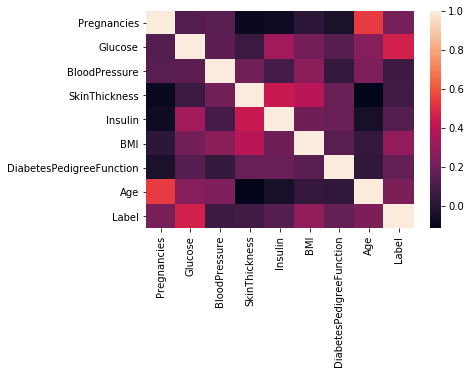

In [16]:
heat_map = sns.heatmap(df.corr())

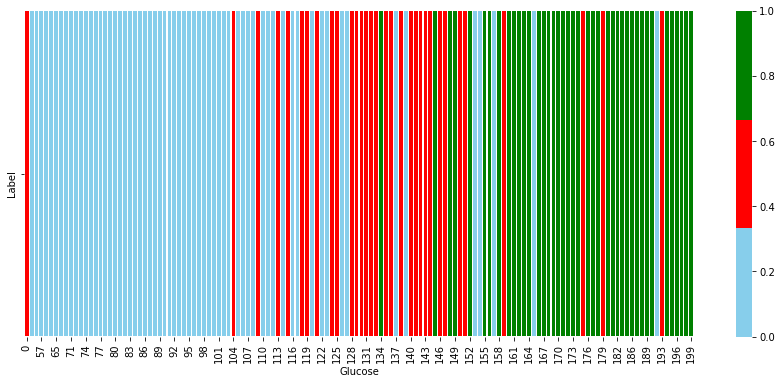

In [17]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='Glucose',values=["Label"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# Removing outliers

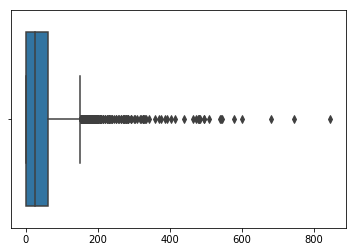

In [18]:
sns.boxplot(df)

In [19]:
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [20]:
df.shape

(688, 9)

# Modeling

In [21]:
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=8))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
#split dataset in target values and features
X=df.iloc[:,:-1]
y=df['Label'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
481/481 [==============================] - 0s 494us/step - loss: 0.2889
Epoch 2/100
481/481 [==============================] - 0s 71us/step - loss: 0.2540
Epoch 3/100
481/481 [==============================] - 0s 77us/step - loss: 0.2353
Epoch 4/100
481/481 [==============================] - 0s 85us/step - loss: 0.2237
Epoch 5/100
481/481 [==============================] - 0s 87us/step - loss: 0.2160
Epoch 6/100
481/481 [==============================] - 0s 75us/step - loss: 0.2092
Epoch 7/100
481/481 [==============================] - 0s 69us/step - loss: 0.2048
Epoch 8/100
481/481 [==============================] - 0s 83us/step - loss: 0.2000
Epoch 9/100
481/481 [==============================] - 0s 73us/step - loss: 0.1950
Epoch 10/100
481/481 [==============================] - 0s 89us/step - loss: 0.1915
Epoch 11/100
481/481 [==============================] - 0s 81us/step - loss: 0.1877
Epoch 12/100
481/481 [==============================] - 0s 81us/step - loss: 0.1845


In [25]:
#perform evaluation on test set
y_test_predicted = model.predict(X_test_scaled)

MSE_test = mean_squared_error(y_test, y_test_predicted)
print('MSE on test set = {}'. format(MSE_test))

MSE on test set = 0.13748338460735698


In [28]:
warnings.filterwarnings('ignore')
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# calculate cross-validated AUC using logistic regression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc').mean()

0.8250801665856164

In [31]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [50]:
#perform evaluation on train and test set
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.12805605988691732
MSE on test set = 0.13748338460735698


In [33]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[130  12]
 [ 28  37]]


In [34]:
# classification accuracy
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8067632850241546
0.8067632850241546


In [35]:
#classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.1932367149758454
0.19323671497584538


In [36]:
#sensitivity
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5692307692307692
0.5692307692307692


In [37]:
#specificity
specificity = TN / (TN + FP)
print(specificity)

0.9154929577464789


In [38]:
#false_positive_rate
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.08450704225352113
0.08450704225352113


In [39]:
#true positive rate
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7551020408163265
0.7551020408163265


In [40]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

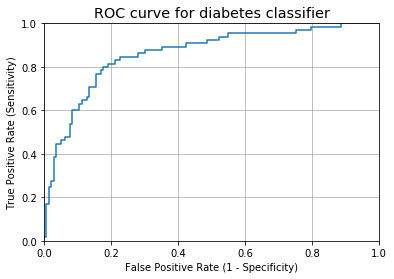

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [43]:
evaluate_threshold(0.7)

Sensitivity: 0.24615384615384617
Specificity: 0.9859154929577465


In [44]:
evaluate_threshold(0.5)

Sensitivity: 0.5384615384615384
Specificity: 0.9154929577464789


In [45]:
evaluate_threshold(0.1)

Sensitivity: 0.9846153846153847
Specificity: 0.204225352112676


In [46]:
evaluate_threshold(1)

Sensitivity: 0.0
Specificity: 1.0


In [47]:
model.save("Pima Indian Diabetes")